In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
benign_df = pd.read_csv('../input/nbaiot-dataset/5.benign.csv')

g_c_df = pd.read_csv('../input/nbaiot-dataset/5.gafgyt.combo.csv')
g_j_df = pd.read_csv('../input/nbaiot-dataset/5.gafgyt.junk.csv')
g_s_df = pd.read_csv('../input/nbaiot-dataset/5.gafgyt.scan.csv')
g_t_df = pd.read_csv('../input/nbaiot-dataset/5.gafgyt.tcp.csv')
g_u_df = pd.read_csv('../input/nbaiot-dataset/5.gafgyt.udp.csv')
m_a_df = pd.read_csv('../input/nbaiot-dataset/5.mirai.ack.csv')
m_sc_df = pd.read_csv('../input/nbaiot-dataset/5.mirai.scan.csv')
m_sy_df = pd.read_csv('../input/nbaiot-dataset/5.mirai.syn.csv')
m_u_df = pd.read_csv('../input/nbaiot-dataset/5.mirai.udp.csv')
m_u_p_df = pd.read_csv('../input/nbaiot-dataset/5.mirai.udpplain.csv')

In [40]:
benign_df['type'] = 'benign'
m_u_df['type'] = 'mirai_udp'
g_c_df['type'] = 'gafgyt_combo'
g_j_df['type'] = 'gafgyt_junk'
g_s_df['type'] = 'gafgyt_scan'
g_t_df['type'] = 'gafgyt_tcp'
g_u_df['type'] = 'gafgyt_udp'
m_a_df['type'] = 'mirai_ack'
m_sc_df['type'] = 'mirai_scan'
m_sy_df['type'] = 'mirai_syn'
m_u_p_df['type'] = 'mirai_udpplain'

In [5]:
df = pd.concat([benign_df, m_u_df, g_c_df,
                g_j_df, g_s_df, g_t_df,
                g_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df],
                axis=0, sort=False, ignore_index=True)

In [6]:
df["type"].value_counts()

mirai_udp         156248
gafgyt_tcp        104510
gafgyt_udp        104011
mirai_scan         96781
mirai_syn          65746
benign             62154
gafgyt_combo       61380
mirai_ack          60554
mirai_udpplain     56681
gafgyt_junk        30898
gafgyt_scan        29297
Name: type, dtype: int64

<AxesSubplot:title={'center':'Class Distribution'}, ylabel='None'>

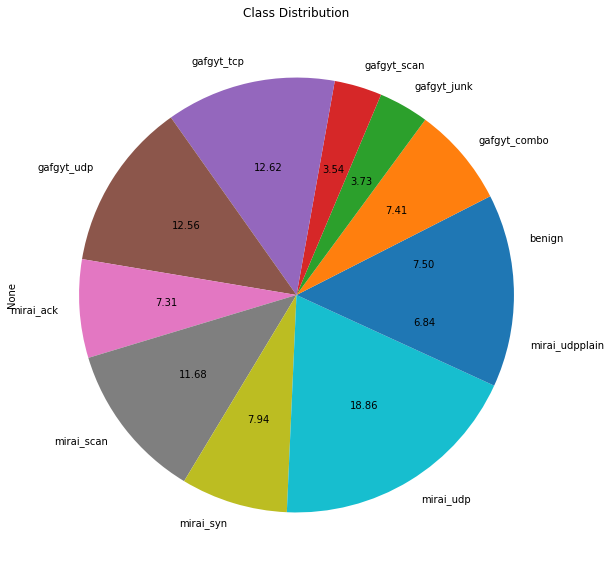

In [7]:
from matplotlib import pyplot as plt

plt.title("Class Distribution")
df.groupby("type").size().plot(kind='pie', autopct='%.2f', figsize=(20,10))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828260 entries, 0 to 828259
Columns: 116 entries, MI_dir_L5_weight to type
dtypes: float64(115), object(1)
memory usage: 733.0+ MB


In [9]:
df = df.sample(frac=1).reset_index(drop=True)

In [10]:
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,95.738052,226.077046,54452.217602,141.449050,253.332762,58112.319314,370.920049,303.771236,60974.734135,4102.905932,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,mirai_udp
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,gafgyt_udp
2,101.905889,540.350386,12320.801986,147.107903,545.679074,9869.445290,364.687041,541.733771,11688.628145,3635.273923,...,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,mirai_ack
3,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,gafgyt_udp
4,64.201827,564.374375,819.906646,107.017907,560.882411,2562.956710,319.307637,495.802254,30586.214629,3640.802601,...,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,mirai_ack


In [11]:
import random

num_client = 10

df["client"] = ["client_{}".format(random.randint(1, num_client)) for _ in range(df.shape[0])]

In [12]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["type"])

In [13]:
features = list(train_df.columns)
features.remove("type")
features.remove("client")
#features

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df["type"] = label_encoder.fit_transform(train_df["type"])
test_df["type"] = label_encoder.transform(test_df["type"])

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

In [16]:
train_df[features] = train_df[features].astype("float32")
test_df[features] = test_df[features].astype("float32")

train_df["type"] = train_df["type"].astype("int32")
test_df["type"] = test_df["type"].astype("int32")

In [17]:
# !pip uninstall --yes tensorboard tb-nightly

# !pip install --quiet --upgrade tensorflow_federated_nightly
# !pip install --quiet --upgrade nest_asyncio

In [18]:
import nest_asyncio
nest_asyncio.apply()

In [19]:
%load_ext tensorboard

In [20]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

2022-08-19 19:51:25.870148: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-19 19:51:26.260626: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-08-19 19:51:26.260680: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-19 19:51:27.501978: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

b'Hello, World!'

In [21]:
client_id_colname = 'client' 

client_ids = df[client_id_colname].unique()

train_client_ids = pd.DataFrame(client_ids).sample(frac=0.8).values.ravel().tolist()
test_client_ids = [x for x in client_ids if x not in train_client_ids]

In [22]:
train_client_ids

['client_10',
 'client_6',
 'client_3',
 'client_8',
 'client_7',
 'client_1',
 'client_9',
 'client_4']

In [23]:
from collections import OrderedDict
from tensorflow.keras.utils import to_categorical

NUM_EPOCHS = 1
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 5

def create_tf_dataset_for_client_fn(client_id):
    client_data = dataframe[dataframe[client_id_colname] == client_id]
    client_data_dict = OrderedDict()
    client_data_dict["features"] = np.array(client_data[features].values, dtype="float32")
    client_data_dict["label"] = np.array(client_data["type"].values, dtype="int32")

    dataset = tf.data.Dataset.from_tensor_slices(client_data_dict)
    dataset = dataset.shuffle(SHUFFLE_BUFFER).batch(1).repeat(NUM_EPOCHS)
    return dataset

In [24]:
dataframe = train_df
train_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
    client_ids=train_client_ids,
    serializable_dataset_fn=create_tf_dataset_for_client_fn)

dataframe = test_df
test_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
    client_ids=test_client_ids,
    serializable_dataset_fn=create_tf_dataset_for_client_fn)

In [25]:
train_data.element_type_structure

OrderedDict([('features',
              TensorSpec(shape=(None, 115), dtype=tf.float32, name=None)),
             ('label', TensorSpec(shape=(None,), dtype=tf.int32, name=None))])

In [26]:
test_data.element_type_structure

OrderedDict([('features',
              TensorSpec(shape=(None, 115), dtype=tf.float32, name=None)),
             ('label', TensorSpec(shape=(None,), dtype=tf.int32, name=None))])

In [27]:
example_dataset = train_data.create_tf_dataset_for_client(train_data.client_ids[0])

example_element = next(iter(example_dataset))

example_element['label'].numpy()

array([7], dtype=int32)

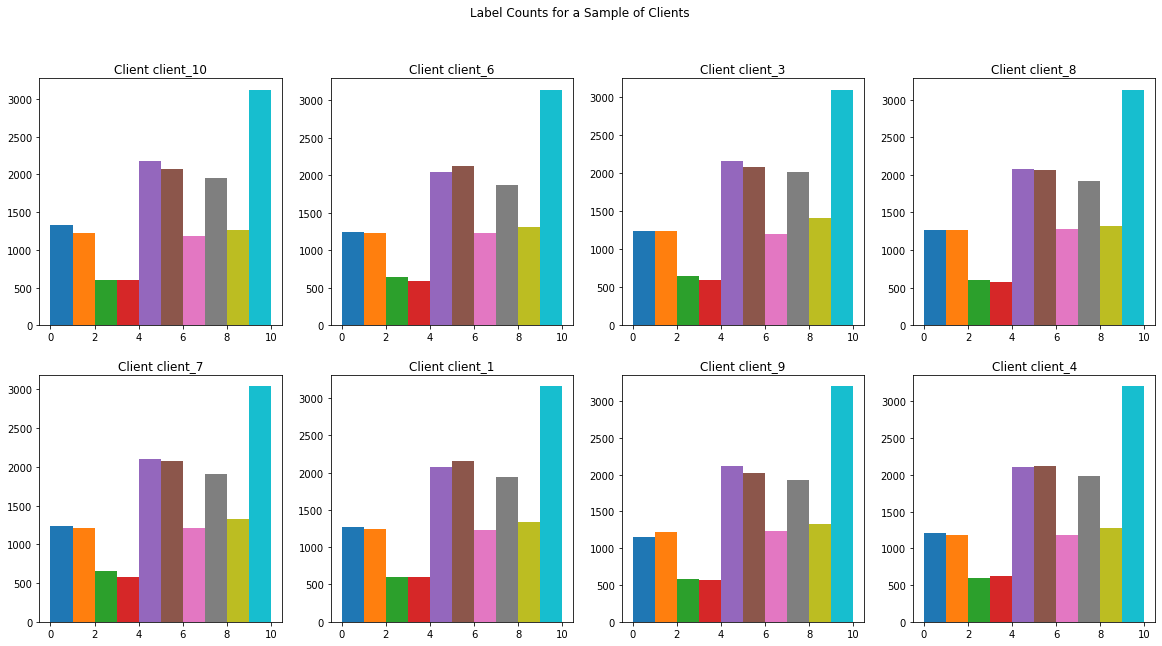

In [28]:
from collections import defaultdict

f = plt.figure(figsize=(20, 10))
f.suptitle('Label Counts for a Sample of Clients')
for i, c_ids in enumerate(train_data.client_ids):
    client_dataset = train_data.create_tf_dataset_for_client(c_ids)
    plot_data = defaultdict(list)
    for example in client_dataset:
        label = example['label'].numpy()[0]
        plot_data[label].append(label)
    plt.subplot(2, 4, i+1)
    plt.title('Client {}'.format(c_ids))
    for j in range(10):
        plt.hist(plot_data[j], density=False, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [29]:
import collections

NUM_EPOCHS = 5
BATCH_SIZE = 128
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

def preprocess(dataset):
    def batch_format_fn(element):
        return collections.OrderedDict(x=tf.reshape(element['features'], [-1, len(features)]),
                                       y=tf.reshape(element['label'], [-1, 1]))
    
    return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [30]:
preprocessed_example_dataset = preprocess(example_dataset)

sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

# sample_batch

In [31]:
from tqdm import tqdm

def make_federated_data(client_data, client_ids):
    return [preprocess(client_data.create_tf_dataset_for_client(x)) for x in tqdm(client_ids)]

In [32]:
NUM_CLIENTS = len(np.unique(train_df[client_id_colname]))

sample_clients = train_data.client_ids[0:NUM_CLIENTS]

federated_train_data = make_federated_data(train_data, sample_clients)

print('Number of client datasets: {l}'.format(l=len(federated_train_data)))
print('First dataset: {d}'.format(d=federated_train_data[0]))

100%|██████████| 8/8 [00:00<00:00, 13.21it/s]

Number of client datasets: 8
First dataset: <PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 115), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>


In [33]:
def create_keras_model():
    filters = 32
    input_shape = (len(features))
    num_classes = len(label_encoder.classes_)  
    clf = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(64, input_dim=input_shape, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
    return clf

keras_model = create_keras_model()
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7424      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 11)                363       
                                                                 
Total params: 9,867
Trainable params: 9,867
Non-trainable params: 0
_________________________________________________________________


In [34]:
import keras.backend as K

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='F1-Score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.f1_score = self.add_weight(name='f1_score', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        true_positives = tf.math.reduce_sum(tf.math.round(tf.clip_by_value(y_true * y_pred, 0, 1)))                
        
        possible_positives = tf.math.reduce_sum(tf.math.round(tf.clip_by_value(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())   
        
        predicted_positives = tf.math.reduce_sum(tf.math.round(tf.clip_by_value(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
                
        self.f1_score.assign(2*((precision*recall)/(precision+recall+K.epsilon())))
        
    def result(self):
        return self.f1_score

    def reset_states(self):
        self.f1_score.assign(0.0)

In [35]:
from keras.metrics import Recall, Precision

def model_fn():
    keras_model = create_keras_model()
    return tff.learning.from_keras_model(
        keras_model,
        input_spec=preprocessed_example_dataset.element_spec,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [36]:
iterative_process = tff.learning.build_federated_averaging_process(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001),
    server_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.002))

In [37]:
str(iterative_process.initialize.type_signature)

'( -> <model=<trainable=<float32[115,64],float32[64],float32[64,32],float32[32],float32[32,11],float32[11]>,non_trainable=<>>,optimizer_state=<int64,float32[115,64],float32[64],float32[64,32],float32[32],float32[32,11],float32[11],float32[115,64],float32[64],float32[64,32],float32[32],float32[32,11],float32[11]>,delta_aggregate_state=<value_sum_process=<>,weight_sum_process=<>>,model_broadcast_state=<>>@SERVER)'

In [38]:
state = iterative_process.initialize()

In [39]:
state, metrics = iterative_process.next(state, federated_train_data)
print('round  1, metrics={}'.format(metrics))

round  1, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.7698298), ('loss', 0.44282886), ('num_examples', 3324275), ('num_batches', 25975)]))])


In [41]:
NUM_ROUNDS = 11
for round_num in range(2, NUM_ROUNDS):
    state, metrics = iterative_process.next(state, federated_train_data)
    print('round {:2d}, metrics={}'.format(round_num, metrics))

round  2, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.7732805), ('loss', 0.43311965), ('num_examples', 3324275), ('num_batches', 25975)]))])
round  3, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.7734207), ('loss', 0.43087295), ('num_examples', 3324275), ('num_batches', 25975)]))])
round  4, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.7752866), ('loss', 0.42572594), ('num_examples', 3324275), ('num_batches', 25975)]))])
round  5, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.7764054), ('loss', 

In [42]:
train_logdir = "training/"
os.makedirs(train_logdir, exist_ok=True)

test_logdir = "testing/"
os.makedirs(test_logdir, exist_ok=True)

In [43]:
summary_writer = tf.summary.create_file_writer(train_logdir)
state = iterative_process.initialize()

In [44]:
with summary_writer.as_default():
    for round_num in range(1, NUM_ROUNDS):
        state, metrics = iterative_process.next(state, federated_train_data)
        for name, value in metrics['train'].items():
            tf.summary.scalar(name, value, step=round_num)

In [45]:
#@test {"skip": true}
!ls {train_logdir}
%tensorboard --logdir {train_logdir} --port=0

events.out.tfevents.1660913557.3e8e24325215.18.0.v2
events.out.tfevents.1660920524.3e8e24325215.18.1.v2
events.out.tfevents.1660922360.3e8e24325215.18.2.v2
events.out.tfevents.1660922886.3e8e24325215.18.3.v2
events.out.tfevents.1660922989.3e8e24325215.18.4.v2
events.out.tfevents.1660923530.3e8e24325215.8214.0.v2
events.out.tfevents.1660928508.3e8e24325215.8214.1.v2
events.out.tfevents.1660929777.3e8e24325215.13353.0.v2
events.out.tfevents.1660939021.3e8e24325215.17194.0.v2


In [46]:
ModelVariables = collections.namedtuple('ModelVariables', 'weights bias num_examples loss_sum accuracy_sum')

In [47]:
def create_model_variables():
    return ModelVariables(
        weights=tf.Variable(
            lambda: tf.zeros(dtype=tf.float32, shape=(len(features), len(label_encoder.classes_))),
            name='weights',
            trainable=True),
        bias=tf.Variable(
            lambda: tf.zeros(dtype=tf.float32, shape=(len(label_encoder.classes_))),
            name='bias',
            trainable=True),
        num_examples=tf.Variable(0.0, name='num_examples', trainable=False),
        loss_sum=tf.Variable(0.0, name='loss_sum', trainable=False),
        accuracy_sum=tf.Variable(0.0, name='accuracy_sum', trainable=False))

In [48]:
def predict_on_batch(variables, x):
    return tf.nn.softmax(tf.matmul(x, variables.weights) + variables.bias)

def model_forward_pass(variables, batch):
    y = predict_on_batch(variables, batch['x'])
    predictions = tf.cast(tf.argmax(y, 1), tf.int32)
    
    flat_labels = tf.reshape(batch['y'], [-1])
    loss = -tf.reduce_mean(tf.reduce_sum(tf.one_hot(flat_labels, len(label_encoder.classes_)) * tf.math.log(y), axis=[1]))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, flat_labels), tf.float32))
    num_examples = tf.cast(tf.size(batch['y']), tf.float32)
    variables.num_examples.assign_add(num_examples)
    variables.loss_sum.assign_add(loss * num_examples)
    variables.accuracy_sum.assign_add(accuracy * num_examples)
    return loss, predictions

In [49]:
def get_local_model_metrics(variables):
    return collections.OrderedDict(
        num_examples=variables.num_examples,
        loss=variables.loss_sum / variables.num_examples,
        accuracy=variables.accuracy_sum / variables.num_examples)

In [50]:
@tff.federated_computation
def aggregate_model_metrics_across_clients(metrics):
    return collections.OrderedDict(
        num_examples=tff.federated_sum(metrics.num_examples),
        loss=tff.federated_mean(metrics.loss, metrics.num_examples),
        accuracy=tff.federated_mean(metrics.accuracy, metrics.num_examples))
  

In [110]:
from typing import Callable, List, OrderedDict

class IOTModel(tff.learning.Model):
    def __init__(self):
        self._variables = create_model_variables()
    @property
    def trainable_variables(self):
        return [self._variables.weights, self._variables.bias]

    @property
    def non_trainable_variables(self):
        return []

    @property
    def local_variables(self):
        return [
            self._variables.num_examples, self._variables.loss_sum,
            self._variables.accuracy_sum
        ]

    @property
    def input_spec(self):
        return OrderedDict(
            x=tf.TensorSpec([None, len(features)], tf.float32),
            y=tf.TensorSpec([None, 1], tf.int32))
    
    @tf.function
    def predict_on_batch(self, x, training=True):
        del training
        return predict_on_batch(self._variables, x)
    
    @tf.function
    def forward_pass(self, batch, training=True):
        del training
        loss, predictions = model_forward_pass(self._variables, batch)
        num_exmaples = tf.shape(batch['x'])[0]
        return tff.learning.BatchOutput(loss=loss, predictions=predictions, num_examples=num_exmaples)

    @tf.function
    def report_local_outputs(self):
        return get_local_model_metrics(self._variables)

    @property
    def federated_output_computation(self):
        return aggregate_model_metrics_across_clients

    @tf.function
    def report_local_unfinalized_metrics(self) -> OrderedDict[str, List[tf.Tensor]]:
        """Creates an `OrderedDict` of metric names to unfinalized values."""
        return collections.OrderedDict(
            num_examples=[self._variables.num_examples],
            loss=[self._variables.loss_sum, self._variables.num_examples],
            accuracy=[self._variables.accuracy_sum, self._variables.num_examples])
    
    def metric_finalizers(self) -> OrderedDict[str, Callable[[List[tf.Tensor]], tf.Tensor]]:
        """Creates an `OrderedDict` of metric names to finalizers."""
        return collections.OrderedDict(
            num_examples=tf.function(func=lambda x: x[0]),
            loss=tf.function(func=lambda x: x[0] / x[1]),
            accuracy=tf.function(func=lambda x: x[0] / x[1]))

In [111]:
iterative_process = tff.learning.build_federated_averaging_process(
    IOTModel,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001))

In [54]:
state = iterative_process.initialize()

In [55]:
state, metrics = iterative_process.next(state, federated_train_data)
print('round  1, metrics={}'.format(metrics))

round  1, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('num_examples', 3324275.0), ('loss', 0.7932569), ('accuracy', 0.6746557)]))])


In [56]:
for round_num in range(2, 11):
    state, metrics = iterative_process.next(state, federated_train_data)
    print('round {:2d}, metrics={}'.format(round_num, metrics))

round  2, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('num_examples', 3324275.0), ('loss', 0.5042148), ('accuracy', 0.7322836)]))])
round  3, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('num_examples', 3324275.0), ('loss', nan), ('accuracy', 0.3781095)]))])
round  4, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('num_examples', 3324275.0), ('loss', nan), ('accuracy', 0.38077807)]))])
round  5, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('num_examples', 3324275.0), ('loss', nan), ('accuracy', 0.3787304)]))])
round  6, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ()

In [57]:
evaluation = tff.learning.build_federated_evaluation(IOTModel)

In [58]:
str(evaluation.type_signature)

'(<server_model_weights=<trainable=<float32[115,11],float32[11]>,non_trainable=<>>@SERVER,federated_dataset={<x=float32[?,115],y=int32[?,1]>*}@CLIENTS> -> <eval=<num_examples=float32,loss=float32,accuracy=float32>>@SERVER)'

In [59]:
train_metrics = evaluation(state.model, federated_train_data)

In [60]:
str(train_metrics)

"OrderedDict([('eval', OrderedDict([('num_examples', 3324275.0), ('loss', 0.46845463), ('accuracy', 0.7510961)]))])"

In [61]:
NUM_CLIENTS = len(np.unique(test_df[client_id_colname]))

sample_clients = test_data.client_ids[0:NUM_CLIENTS]

federated_test_data = make_federated_data(test_data, sample_clients)

len(federated_test_data), federated_test_data[0]

100%|██████████| 2/2 [00:00<00:00, 11.00it/s]


(2,
 <PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 115), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>)

In [62]:
test_metrics = evaluation(state.model, federated_test_data)

In [122]:
# model_for_inference = create_keras_model()
# state.model.assign_weights_to(model_for_inference)

# y_hat = model_for_inference.predict(test_df[features].values, batch_size=BATCH_SIZE, verbose=1)
# y_hat = np.argmax(y_hat, axis=1)
# y_hat

iot_model = IOTModel()
state.model.assign_weights_to(iot_model)
y_hat = iot_model.predict_on_batch(test_df[features])
y_hat = np.argmax(y_hat, axis=1)
y_hat

array([7, 0, 4, ..., 1, 8, 4])

In [121]:
from sklearn.metrics import classification_report

print(classification_report(test_df["type"].values, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12431
           1       0.76      0.80      0.78     12276
           2       0.56      0.50      0.53      6180
           3       0.99      0.90      0.94      5859
           4       0.50      1.00      0.66     20902
           5       0.00      0.00      0.00     20802
           6       0.70      0.37      0.48     12111
           7       0.90      0.99      0.95     19356
           8       0.98      0.85      0.91     13149
           9       0.78      0.92      0.84     31250
          10       0.82      0.84      0.83     11336

    accuracy                           0.75    165652
   macro avg       0.73      0.74      0.72    165652
weighted avg       0.69      0.75      0.70    165652

